In [438]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

Importation des fichiers

In [439]:
population = pd.read_csv('Population_2000_2018.csv')
dispo_alim = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
stability = pd.read_excel('PoliticalStability.xlsx')
import_export_year = pd.read_csv('import_export_2000-2018.csv')
coord = pd.read_excel('coord.xlsx')
pib = pd.read_csv('pib_par_habitant.csv')

Fichier Population

In [440]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [441]:
population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


In [442]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


On filtre les colonnes et on renomme la colonne

In [443]:
population = population.rename(columns={'Valeur':'Population'})
population['Population'] = population['Population']*1000
population_2017 = population[['Zone', 'Population']].loc[population['Année'] == 2017]
population = population[['Zone','Année', 'Population']]

On check les valeurs en double

In [444]:
valeurs_en_double = population[population.duplicated('Zone', keep=False)]
print(valeurs_en_double['Zone'].unique())

['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Andorre'
 'Angola' 'Anguilla' 'Antigua-et-Barbuda' 'Antilles néerlandaises (ex)'
 'Arabie saoudite' 'Argentine' 'Arménie' 'Aruba' 'Australie' 'Autriche'
 'Azerbaïdjan' 'Bahamas' 'Bahreïn' 'Bangladesh' 'Barbade' 'Bélarus'
 'Belgique' 'Belize' 'Bénin' 'Bermudes' 'Bhoutan'
 'Bolivie (État plurinational de)' 'Bonaire, Saint-Eustache et Saba'
 'Bosnie-Herzégovine' 'Botswana' 'Brésil' 'Brunéi Darussalam' 'Bulgarie'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodge' 'Cameroun' 'Canada'
 'Chili' 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao'
 'Chine, continentale' 'Chine, Taiwan Province de' 'Chypre' 'Colombie'
 'Comores' 'Congo' 'Costa Rica' "Côte d'Ivoire" 'Croatie' 'Cuba' 'Curaçao'
 'Danemark' 'Djibouti' 'Dominique' 'Égypte' 'El Salvador'
 'Émirats arabes unis' 'Équateur' 'Érythrée' 'Espagne' 'Estonie'
 'Eswatini' "États-Unis d'Amérique" 'Éthiopie' 'Fédération de Russie'
 'Fidji' 'Finlande' 'France' 'Gabon' 'Gambie' 'Géorgie

Fichier Disponibilité alimentaire

In [445]:
dispo_alim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [446]:
dispo_alim.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [447]:
dispo_alim.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [448]:
dispo_alim = dispo_alim[['Zone','Élément', 'Produit', 'Unité', 'Valeur']].loc[dispo_alim['Produit'] == 'Viande de Volailles']

In [449]:
dispo_alim.head(20)

,Zone,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.00
655,Afghanistan,Pertes,Viande de Volailles,Milliers de tonnes,2.00
656,Afghanistan,Résidus,Viande de Volailles,Milliers de tonnes,0.00
657,Afghanistan,Nourriture,Viande de Volailles,Milliers de tonnes,55.00
658,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,kg,1.53
659,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,Kcal/personne/jour,5.00
660,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,0.54


In [450]:
valeurs_en_double = dispo_alim[dispo_alim.duplicated(['Zone','Élément', 'Produit', 'Unité', 'Valeur'], keep=False)]
print(valeurs_en_double['Zone'].unique())

[]


In [451]:
dispo_alim.head(30)

,Zone,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.00
655,Afghanistan,Pertes,Viande de Volailles,Milliers de tonnes,2.00
656,Afghanistan,Résidus,Viande de Volailles,Milliers de tonnes,0.00
657,Afghanistan,Nourriture,Viande de Volailles,Milliers de tonnes,55.00
658,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,kg,1.53
659,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,Kcal/personne/jour,5.00
660,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,0.54


On créé plusieurs variables, le % d'exportation, le % l'importation, le % de nourriture (c'est à dire le % de disponibilité alimentaire utilisé pour l'alimentation humaine) et le % de production de poulet

In [452]:
dispo_alim_pays = dispo_alim['Zone'].unique()
dispo_alim_filtre = pd.DataFrame({'Zone': [],
                              'Importations - Quantité': [],
                              'Exportations - Quantité': [],
                              'Nourriture': [],
                              'Disponibilité alimentaire en quantité (kg/personne/an)': [],
                              'Disponibilité intérieure': [],
                              'Production': []
                              })
dispo_alim_filtre['Zone'] = dispo_alim_pays
mapping = dispo_alim.loc[dispo_alim['Élément'] == 'Importations - Quantité'].set_index('Zone')['Valeur'].to_dict()
dispo_alim_filtre['Importations - Quantité'] = dispo_alim_filtre['Zone'].map(mapping)
mapping = dispo_alim.loc[dispo_alim['Élément'] == 'Exportations - Quantité'].set_index('Zone')['Valeur'].to_dict()
dispo_alim_filtre['Exportations - Quantité'] = dispo_alim_filtre['Zone'].map(mapping)
mapping = dispo_alim.loc[dispo_alim['Élément'] == 'Nourriture'].set_index('Zone')['Valeur'].to_dict()
dispo_alim_filtre['Nourriture'] = dispo_alim_filtre['Zone'].map(mapping)
mapping = dispo_alim.loc[dispo_alim['Élément'] == 'Disponibilité alimentaire en quantité (kg/personne/an)'].set_index('Zone')['Valeur'].to_dict()
dispo_alim_filtre['Disponibilité alimentaire en quantité (kg/personne/an)'] = dispo_alim_filtre['Zone'].map(mapping)
mapping = dispo_alim.loc[dispo_alim['Élément'] == 'Disponibilité intérieure'].set_index('Zone')['Valeur'].to_dict()
dispo_alim_filtre['Disponibilité intérieure'] = dispo_alim_filtre['Zone'].map(mapping)
mapping = dispo_alim.loc[dispo_alim['Élément'] == 'Production'].set_index('Zone')['Valeur'].to_dict()
dispo_alim_filtre['Production'] = dispo_alim_filtre['Zone'].map(mapping)
#mapping = dispo_alim.loc[dispo_alim['Élément'] == 'Alimentation pour touristes'].set_index('Zone')['Valeur'].to_dict()
#dispo_alim_filtre['Alimentation pour touristes'] = dispo_alim_filtre['Zone'].map(mapping)
dispo_alim_filtre['%_Exportations'] = dispo_alim_filtre['Exportations - Quantité']/(dispo_alim_filtre['Production']+dispo_alim_filtre['Importations - Quantité'])*100
dispo_alim_filtre['%_Imporatations'] = dispo_alim_filtre['Importations - Quantité']/(dispo_alim_filtre['Production']+dispo_alim_filtre['Importations - Quantité'])*100
dispo_alim_filtre['%_Nourriture'] = (dispo_alim_filtre['Nourriture'])/(dispo_alim_filtre['Production']+dispo_alim_filtre['Importations - Quantité'])*100
dispo_alim_filtre['%_Production'] = dispo_alim_filtre['Production']/(dispo_alim_filtre['Production']+dispo_alim_filtre['Importations - Quantité'])*100
dispo_alim_filtre.head()

,Zone,Importations - Quantité,Exportations - Quantité,Nourriture,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Production,%_Exportations,%_Imporatations,%_Nourriture,%_Production
0,Afghanistan,29.0,NaN,55.0,1.53,57.0,28.0,NaN,50.877193,96.491228,49.122807
1,Afrique du Sud,514.0,63.0,2035.0,35.69,2118.0,1667.0,2.888583,23.567171,93.305823,76.432829
2,Albanie,38.0,0.0,47.0,16.36,47.0,13.0,0.000000,74.509804,92.156863,25.490196
3,Algérie,2.0,0.0,264.0,6.38,277.0,275.0,0.000000,0.722022,95.306859,99.277978
4,Allemagne,842.0,646.0,1609.0,19.47,1739.0,1514.0,27.419355,35.738540,68.293718,64.261460


On créé des variables rapporté à la population

In [453]:
dispo_alim_filtre = dispo_alim_filtre.merge(population[['Population', 'Zone']].loc[population['Année'] == 2017], how='inner', on='Zone')
dispo_alim_filtre['Rapport Nourriture/Pop'] = dispo_alim_filtre['Nourriture'] / dispo_alim_filtre['Population'] * 1000000
dispo_alim_filtre['Rapport Importation/Pop'] = dispo_alim_filtre['Importations - Quantité'] / dispo_alim_filtre['Population'] * 1000000
dispo_alim_filtre['Rapport Exportation/Pop'] = dispo_alim_filtre['Exportations - Quantité'] / dispo_alim_filtre['Population'] * 1000000
dispo_alim_filtre['Rapport Production/Pop'] = dispo_alim_filtre['Production'] / dispo_alim_filtre['Population'] * 1000000
dispo_alim_filtre.head()

,Zone,Importations - Quantité,Exportations - Quantité,Nourriture,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Production,%_Exportations,%_Imporatations,%_Nourriture,%_Production,Population,Rapport Nourriture/Pop,Rapport Importation/Pop,Rapport Exportation/Pop,Rapport Production/Pop
0,Afghanistan,29.0,NaN,55.0,1.53,57.0,28.0,NaN,50.877193,96.491228,49.122807,36296113.0,1.515314,0.798984,NaN,0.771432
1,Afrique du Sud,514.0,63.0,2035.0,35.69,2118.0,1667.0,2.888583,23.567171,93.305823,76.432829,57009756.0,35.695645,9.016001,1.105074,29.240609
2,Albanie,38.0,0.0,47.0,16.36,47.0,13.0,0.000000,74.509804,92.156863,25.490196,2884169.0,16.295855,13.175372,0.000000,4.507364
3,Algérie,2.0,0.0,264.0,6.38,277.0,275.0,0.000000,0.722022,95.306859,99.277978,41389189.0,6.378477,0.048322,0.000000,6.644247
4,Allemagne,842.0,646.0,1609.0,19.47,1739.0,1514.0,27.419355,35.738540,68.293718,64.261460,82658409.0,19.465654,10.186501,7.815297,18.316346


Fichier Stabilité politique

In [454]:
stability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              3526 non-null   object 
 1   Year                 3526 non-null   int64  
 2   Political_Stability  3526 non-null   float64
 3   Granularity          3526 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 110.3+ KB


In [455]:
stability.describe()

,Year,Political_Stability
count,3526.000000,3526.000000
mean,2009.521838,-0.051044
std,5.255833,0.996039
min,2000.000000,-3.310000
25%,2005.000000,-0.710000
50%,2010.000000,0.050000
75%,2014.000000,0.797500
max,2018.000000,1.970000


In [456]:
stability.head()

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2002,-2.04,Total
2,Afghanistan,2003,-2.20,Total
3,Afghanistan,2004,-2.30,Total
4,Afghanistan,2005,-2.07,Total


On créé une variable Evolution de la stabilité politique

In [457]:
pays_stability = stability['Country'].unique()
stab_filtered = pd.DataFrame({'Country': [],
                              'Year': [],
                              'Political_Stability': [],
                              'Evo%_Stability': []})
for pays in pays_stability:
    min_year = stability.loc[stability['Country'] == pays, 'Year'].min()
    max_year = stability.loc[stability['Country'] == pays, 'Year'].max()
    if max_year > 2017:
        max_year = 2017
    stab_min = stability['Political_Stability'].loc[(stability['Country'] == pays) & (stability['Year'] == min_year)]
    stab_max = stability['Political_Stability'].loc[(stability['Country'] == pays) & (stability['Year'] == max_year)]
    stab_filtered = stab_filtered.append({'Country': pays,
                                        'Year': max_year,
                                        'Political_Stability': stability['Political_Stability'].loc[(stability['Country'] == pays) & (stability['Year'] == max_year)].iloc[0],
                                        'Evo%_Stability': 100-((stab_max.iloc[0]+10)/(stab_min.iloc[0]+10)*100)}, 
                                        ignore_index=True)
stab_filtered['Year'] = stab_filtered['Year'].astype(int)
stab_filtered.head()   

C:\Users\kilia\AppData\Local\Temp\ipykernel_4936\425972222.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stab_filtered = stab_filtered.append({'Country': pays,
C:\Users\kilia\AppData\Local\Temp\ipykernel_4936\425972222.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stab_filtered = stab_filtered.append({'Country': pays,
C:\Users\kilia\AppData\Local\Temp\ipykernel_4936\425972222.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stab_filtered = stab_filtered.append({'Country': pays,
C:\Users\kilia\AppData\Local\Temp\ipykernel_4936\425972222.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stab_filtered = stab_filtered.a

,Country,Year,Political_Stability,Evo%_Stability
0,Afghanistan,2017,-2.80,4.761905
1,Afrique du Sud,2017,-0.28,0.511771
2,Albanie,2017,0.38,-9.725159
3,Algérie,2017,-0.92,-5.950992
4,Allemagne,2017,0.59,7.186678


In [458]:
stab_filtered.describe()

,Year,Political_Stability,Evo%_Stability
count,200.000000,200.000000,200.000000
mean,2016.930000,-0.048800,0.668027
std,0.698239,0.997051,7.405610
min,2010.000000,-2.940000,-22.592593
25%,2017.000000,-0.655000,-2.264907
50%,2017.000000,0.040000,0.793558
75%,2017.000000,0.782500,4.855258
max,2017.000000,1.920000,24.847251


In [459]:
stab_filtered['Year'].unique()

array([2017, 2010])

In [460]:
print(stab_filtered['Country'].loc[stab_filtered['Year'] == 2010])

45     Cook (Îles)
130           Niue
Name: Country, dtype: object


In [461]:
stab_filtered = stab_filtered.loc[stab_filtered['Year'] != 2010]

In [462]:
stab_filtered = stab_filtered.rename(columns={'Country': 'Zone'})
stab_filtered = stab_filtered[['Zone', 'Political_Stability', 'Evo%_Stability']]
stab_filtered.head()

,Zone,Political_Stability,Evo%_Stability
0,Afghanistan,-2.80,4.761905
1,Afrique du Sud,-0.28,0.511771
2,Albanie,0.38,-9.725159
3,Algérie,-0.92,-5.950992
4,Allemagne,0.59,7.186678


Fichier Importation et Exportation

In [463]:
import_export_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17842 entries, 0 to 17841
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code Domaine            17842 non-null  object
 1   Domaine                 17842 non-null  object
 2   Code zone (M49)         17842 non-null  int64 
 3   Zone                    17842 non-null  object
 4   Code Élément            17842 non-null  int64 
 5   Élément                 17842 non-null  object
 6   Code Produit (CPC)      17842 non-null  int64 
 7   Produit                 17842 non-null  object
 8   Code année              17842 non-null  int64 
 9   Année                   17842 non-null  int64 
 10  Unité                   17842 non-null  object
 11  Valeur                  17842 non-null  int64 
 12  Symbole                 17842 non-null  object
 13  Description du Symbole  17842 non-null  object
 14  Note                    3160 non-null   object
dtypes:

In [464]:
import_export_year.describe()

,Code zone (M49),Code Élément,Code Produit (CPC),Code année,Année,Valeur
count,17842.000000,17842.000000,17842.000000,17842.000000,17842.000000,17842.000000
mean,434.515637,5734.927250,2151.337855,2008.798341,2008.798341,7176.251653
std,257.237436,146.998468,0.472992,5.322430,5.322430,32993.091631
min,4.000000,5609.000000,2151.000000,2000.000000,2000.000000,0.000000
25%,204.000000,5609.000000,2151.000000,2004.000000,2004.000000,2.000000
50%,422.000000,5622.000000,2151.000000,2009.000000,2009.000000,192.000000
75%,678.000000,5909.000000,2152.000000,2013.000000,2013.000000,2376.000000
max,894.000000,5922.000000,2152.000000,2018.000000,2018.000000,787855.000000


In [465]:
import_export_year.head(10)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - Quantité,2152,Dindes,2014,2014,1000 têtes,9,X,Ciffre de sources internationales,Données estimées en utilisant les données des ...
1,TCL,Cultures et produits animaux,4,Afghanistan,5622,Importations - Valeur,2152,Dindes,2014,2014,1000 US$,40,X,Ciffre de sources internationales,Données estimées en utilisant les données des ...
2,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - Quantité,2151,Poulets,2000,2000,1000 têtes,0,E,Valeur estimée,NaN
3,TCL,Cultures et produits animaux,4,Afghanistan,5622,Importations - Valeur,2151,Poulets,2000,2000,1000 US$,0,E,Valeur estimée,NaN
4,TCL,Cultures et produits animaux,4,Afghanistan,5909,Exportations - Quantité,2151,Poulets,2000,2000,1000 têtes,0,E,Valeur estimée,NaN
5,TCL,Cultures et produits animaux,4,Afghanistan,5922,Exportations - Valeur,2151,Poulets,2000,2000,1000 US$,0,E,Valeur estimée,NaN
6,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - Quantité,2151,Poulets,2001,2001,1000 têtes,0,E,Valeur estimée,NaN
7,TCL,Cultures et produits animaux,4,Afghanistan,5622,Importations - Valeur,2151,Poulets,2001,2001,1000 US$,0,E,Valeur estimée,NaN
8,TCL,Cultures et produits animaux,4,Afghanistan,5909,Exportations - Quantité,2151,Poulets,2001,2001,1000 têtes,0,E,Valeur estimée,NaN
9,TCL,Cultures et produits animaux,4,Afghanistan,5922,Exportations - Valeur,2151,Poulets,2001,2001,1000 US$,0,E,Valeur estimée,NaN


In [466]:
import_export_year = import_export_year[['Zone', 'Élément', 'Produit', 'Année', 'Valeur']]
import_export_year = import_export_year.groupby(['Zone', 'Année', 'Élément'])['Valeur'].sum().reset_index()
import_export_year['Produit'] = 'Volailles'

import_export_year.head(20)

,Zone,Année,Élément,Valeur,Produit
0,Afghanistan,2000,Exportations - Quantité,0,Volailles
1,Afghanistan,2000,Exportations - Valeur,0,Volailles
2,Afghanistan,2000,Importations - Quantité,0,Volailles
3,Afghanistan,2000,Importations - Valeur,0,Volailles
4,Afghanistan,2001,Exportations - Quantité,0,Volailles
5,Afghanistan,2001,Exportations - Valeur,0,Volailles
6,Afghanistan,2001,Importations - Quantité,0,Volailles
7,Afghanistan,2001,Importations - Valeur,0,Volailles
8,Afghanistan,2002,Exportations - Quantité,0,Volailles
9,Afghanistan,2002,Exportations - Valeur,0,Volailles


In [467]:
import_export_year = import_export_year.merge(population, how='inner', on=['Zone', 'Année'])
import_export_year.head()

,Zone,Année,Élément,Valeur,Produit,Population
0,Afghanistan,2000,Exportations - Quantité,0,Volailles,20779953.0
1,Afghanistan,2000,Exportations - Valeur,0,Volailles,20779953.0
2,Afghanistan,2000,Importations - Quantité,0,Volailles,20779953.0
3,Afghanistan,2000,Importations - Valeur,0,Volailles,20779953.0
4,Afghanistan,2001,Exportations - Quantité,0,Volailles,21606988.0


In [468]:
import_export_year = import_export_year.loc[(import_export_year['Élément'] == 'Exportations - Quantité') |
                                            (import_export_year['Élément'] == 'Importations - Quantité')]
import_export_year.head()

,Zone,Année,Élément,Valeur,Produit,Population
0,Afghanistan,2000,Exportations - Quantité,0,Volailles,20779953.0
2,Afghanistan,2000,Importations - Quantité,0,Volailles,20779953.0
4,Afghanistan,2001,Exportations - Quantité,0,Volailles,21606988.0
6,Afghanistan,2001,Importations - Quantité,0,Volailles,21606988.0
8,Afghanistan,2002,Exportations - Quantité,0,Volailles,22600770.0


In [469]:
import_export_year['Export/Pop'] = import_export_year['Valeur'].loc[import_export_year['Élément'] == 'Exportations - Quantité']/import_export_year['Population']*100
import_export_year['Import/Pop'] = import_export_year['Valeur'].loc[import_export_year['Élément'] == 'Importations - Quantité']/import_export_year['Population']*100

In [470]:
import_export_year.head()

,Zone,Année,Élément,Valeur,Produit,Population,Export/Pop,Import/Pop
0,Afghanistan,2000,Exportations - Quantité,0,Volailles,20779953.0,0.0,NaN
2,Afghanistan,2000,Importations - Quantité,0,Volailles,20779953.0,NaN,0.0
4,Afghanistan,2001,Exportations - Quantité,0,Volailles,21606988.0,0.0,NaN
6,Afghanistan,2001,Importations - Quantité,0,Volailles,21606988.0,NaN,0.0
8,Afghanistan,2002,Exportations - Quantité,0,Volailles,22600770.0,0.0,NaN


On créé deux variables qui sont l'évolution de l'importation rapporté à la population ainsi que l'évolution de l'exportation rapporté à la population

In [471]:
pays_import_export = import_export_year['Zone'].unique()
import_export_year_evo = pd.DataFrame({'Zone': [],
                              'Evo%_Export/Pop': [],
                              'Evo%_Import/Pop': []})
for pays in pays_import_export:
    export_min = import_export_year['Export/Pop'].loc[(import_export_year['Zone'] == pays) & (import_export_year['Année'] == 2000) & (import_export_year['Élément'] == 'Exportations - Quantité')]
    export_max = import_export_year['Export/Pop'].loc[(import_export_year['Zone'] == pays) & (import_export_year['Année'] == 2017) & (import_export_year['Élément'] == 'Exportations - Quantité')]
    import_min = import_export_year['Import/Pop'].loc[(import_export_year['Zone'] == pays) & (import_export_year['Année'] == 2000) & (import_export_year['Élément'] == 'Importations - Quantité')]
    import_max = import_export_year['Import/Pop'].loc[(import_export_year['Zone'] == pays) & (import_export_year['Année'] == 2017) & (import_export_year['Élément'] == 'Importations - Quantité')]
    export_max_global = import_export_year['Export/Pop'].loc[import_export_year['Élément'] == 'Exportations - Quantité'].max()
    import_max_global = import_export_year['Import/Pop'].loc[import_export_year['Élément'] == 'Importations - Quantité'].max()
    if not export_min.empty:
        export_min = export_min.iloc[0]
    else:
        export_min = 0
    if not export_max.empty:
        export_max = export_max.iloc[0]
    else:
        export_max = 0
    if not import_min.empty:
        import_min = import_min.iloc[0]
    else:
        import_min = 0
    if not import_max.empty:
        import_max = import_max.iloc[0]
    else:
        import_max = 0
        
    exportation = import_export_year['Valeur'].loc[(import_export_year['Zone'] == pays) & (import_export_year['Année'] == 2017) & (import_export_year['Élément'] == 'Exportations - Quantité')]
    importation = import_export_year['Valeur'].loc[(import_export_year['Zone'] == pays) & (import_export_year['Année'] == 2017) & (import_export_year['Élément'] == 'Importations - Quantité')]
    
    if not exportation.empty:
        exportation = exportation.iloc[0]
    else:
        exportation = 0
    if not importation.empty:
        importation = importation.iloc[0]
    else:
        importation = 0
    import_export_year_evo = import_export_year_evo.append({'Zone': pays,
                                        'Exportations': exportation,
                                        'Imporations': importation,
                                        'Export/Pop': export_max,
                                        'Import/Pop': import_max,
                                        'Evo%_Export/Pop': 100-((export_max+export_max_global)/(export_min+export_max_global)*100),
                                        'Evo%_Import/Pop': 100-((import_max+import_max_global)/(import_min+import_max_global)*100)}, 
                                        ignore_index=True)
import_export_year_evo.head()

C:\Users\kilia\AppData\Local\Temp\ipykernel_4936\2013057247.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  import_export_year_evo = import_export_year_evo.append({'Zone': pays,
C:\Users\kilia\AppData\Local\Temp\ipykernel_4936\2013057247.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  import_export_year_evo = import_export_year_evo.append({'Zone': pays,
C:\Users\kilia\AppData\Local\Temp\ipykernel_4936\2013057247.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  import_export_year_evo = import_export_year_evo.append({'Zone': pays,
C:\Users\kilia\AppData\Local\Temp\ipykernel_4936\2013057247.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

,Zone,Evo%_Export/Pop,Evo%_Import/Pop,Exportations,Imporations,Export/Pop,Import/Pop
0,Afghanistan,0.000000,-3.145662,0.0,18970.0,0.000000,0.052265
1,Afrique du Sud,-0.359247,0.164938,6110.0,397.0,0.010717,0.000696
2,Albanie,0.002521,-5.830877,0.0,4745.0,0.000000,0.164519
3,Algérie,0.000000,1.041509,0.0,224.0,0.000000,0.000541
4,Allemagne,-22.374989,-6.853765,352115.0,194454.0,0.425988,0.235250


Fichier PIB par habitant

In [472]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            211 non-null    object 
 1   Domaine                 211 non-null    object 
 2   Code zone (M49)         211 non-null    int64  
 3   Zone                    211 non-null    object 
 4   Code Élément            211 non-null    int64  
 5   Élément                 211 non-null    object 
 6   Code Produit            211 non-null    int64  
 7   Produit                 211 non-null    object 
 8   Code année              211 non-null    int64  
 9   Année                   211 non-null    int64  
 10  Unité                   211 non-null    object 
 11  Valeur                  211 non-null    float64
 12  Symbole                 211 non-null    object 
 13  Description du Symbole  211 non-null    object 
 14  Note                    0 non-null      fl

In [473]:
pib.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,211.000000,211.0,211.0,211.0,211.0,211.000000,0.0
mean,429.407583,6119.0,22008.0,2017.0,2017.0,16889.862489,NaN
std,251.237972,0.0,0.0,0.0,0.0,25548.750797,NaN
min,4.000000,6119.0,22008.0,2017.0,2017.0,295.620936,NaN
25%,210.000000,6119.0,22008.0,2017.0,2017.0,2082.324020,NaN
50%,430.000000,6119.0,22008.0,2017.0,2017.0,6450.319585,NaN
75%,642.500000,6119.0,22008.0,2017.0,2017.0,19806.127104,NaN
max,894.000000,6119.0,22008.0,2017.0,2017.0,173611.814797,NaN


In [474]:
valeurs_en_double = pib[pib.duplicated('Zone', keep=False)]
print(valeurs_en_double['Zone'].unique())

[]


In [475]:
pib.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6723.928582,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4521.752217,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4134.936055,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44670.222282,X,Ciffre de sources internationales,NaN


In [476]:
pib = pib[['Zone', 'Valeur']]
pib = pib.rename(columns={'Valeur': 'PIB/Hab'})
pib.head()

,Zone,PIB/Hab
0,Afghanistan,530.149831
1,Afrique du Sud,6723.928582
2,Albanie,4521.752217
3,Algérie,4134.936055
4,Allemagne,44670.222282


Fichier coordonnées des pays

In [477]:
coord.head()

,country,latitude,longitude,name (nom)
0,AF,"33,93911","67,709953",Afghanistan
1,ZA,"-30,559482","22,937506",Afrique du Sud
2,AL,"41,153332","20,168331",Albanie
3,DZ,"28,033886","1,659626",Algérie
4,DE,"51,165691","10,451526",Allemagne


On créé une variable distance avec la latitude et la longitude des pays

In [478]:
from numpy import sin, cos, arccos, pi, round
coord = coord[['latitude', 'longitude', 'name (nom)']].rename(columns={'name (nom)': 'Zone'})
coord['latitude'] = pd.to_numeric(coord['latitude'].str.replace(',','.'))
coord['longitude'] = pd.to_numeric(coord['longitude'].str.replace(',','.'))

In [479]:
lagitude_fr = coord['latitude'].loc[coord['Zone'] == 'France']
longitude_fr = coord['longitude'].loc[coord['Zone'] == 'France']
def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2, longitude2):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    
    return round(distance * 1.609344, 2)#en km

coord['distance'] = np.nan
for index, ligne in coord.iterrows():
    coord.at[index, 'distance'] = getDistanceBetweenPointsNew(lagitude_fr, longitude_fr, ligne['latitude'], ligne['longitude'])

In [480]:
coord = coord[['Zone', 'distance']]

In [481]:
print(len(dispo_alim_filtre))
print(len(import_export_year_evo))
print(len(coord))

172
192
245


On fusionne les dataframes

In [482]:
df_final = dispo_alim_filtre.merge(import_export_year_evo[['Zone', 'Evo%_Import/Pop', 'Evo%_Export/Pop']], on='Zone', how='left')
df_final = df_final.merge(coord, on='Zone', how='left')
df_final = df_final.merge(stab_filtered, on='Zone', how='left')
df_final = df_final.merge(pib, on='Zone', how='left')
df_final.head(10)

,Zone,Importations - Quantité,Exportations - Quantité,Nourriture,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Production,%_Exportations,%_Imporatations,%_Nourriture,...,Rapport Nourriture/Pop,Rapport Importation/Pop,Rapport Exportation/Pop,Rapport Production/Pop,Evo%_Import/Pop,Evo%_Export/Pop,distance,Political_Stability,Evo%_Stability,PIB/Hab
0,Afghanistan,29.0,NaN,55.0,1.53,57.0,28.0,NaN,50.877193,96.491228,...,1.515314,0.798984,NaN,0.771432,-3.145662,0.000000,5572.71,-2.80,4.761905,530.149831
1,Afrique du Sud,514.0,63.0,2035.0,35.69,2118.0,1667.0,2.888583,23.567171,93.305823,...,35.695645,9.016001,1.105074,29.240609,0.164938,-0.359247,8789.06,-0.28,0.511771,6723.928582
2,Albanie,38.0,0.0,47.0,16.36,47.0,13.0,0.000000,74.509804,92.156863,...,16.295855,13.175372,0.000000,4.507364,-5.830877,0.002521,1545.60,0.38,-9.725159,4521.752217
3,Algérie,2.0,0.0,264.0,6.38,277.0,275.0,0.000000,0.722022,95.306859,...,6.378477,0.048322,0.000000,6.644247,1.041509,0.000000,2023.54,-0.92,-5.950992,4134.936055
4,Allemagne,842.0,646.0,1609.0,19.47,1739.0,1514.0,27.419355,35.738540,68.293718,...,19.465654,10.186501,7.815297,18.316346,-6.853765,-22.374989,815.79,0.59,7.186678,44670.222282
5,Angola,277.0,0.0,315.0,10.56,319.0,42.0,0.000000,86.833856,98.746082,...,10.564526,9.290075,0.000000,1.408603,-0.267012,0.000000,6574.32,-0.33,-21.482412,4042.681403
6,Antigua-et-Barbuda,7.0,0.0,5.0,54.10,7.0,0.0,0.000000,100.000000,71.428571,...,52.396621,73.355270,0.000000,0.000000,0.159784,-0.413407,6659.12,0.75,-0.373483,16110.556281
7,Arabie saoudite,722.0,10.0,1435.0,43.36,1435.0,616.0,0.747384,53.961136,107.249626,...,43.351930,21.811912,0.302104,18.609609,0.580850,0.028190,4546.09,-0.58,7.917889,20138.146333
8,Argentine,8.0,207.0,1856.0,42.24,1962.0,2161.0,9.543568,0.368834,85.569387,...,42.242167,0.182078,4.711276,49.183902,0.164110,0.180515,11464.33,0.17,-0.693069,14609.783370
9,Arménie,35.0,0.0,47.0,16.06,47.0,11.0,0.000000,76.086957,102.173913,...,15.960386,11.885394,0.000000,3.735409,-12.357147,0.000000,3496.74,-0.62,-0.643777,4041.995072


In [483]:
len(df_final)

172

In [484]:
df_final.isna().sum()

Zone                                                       0
Importations - Quantité                                    2
Exportations - Quantité                                   37
Nourriture                                                 2
Disponibilité alimentaire en quantité (kg/personne/an)     0
Disponibilité intérieure                                   2
Production                                                 4
%_Exportations                                            37
%_Imporatations                                            4
%_Nourriture                                               4
%_Production                                               4
Population                                                 0
Rapport Nourriture/Pop                                     2
Rapport Importation/Pop                                    2
Rapport Exportation/Pop                                   37
Rapport Production/Pop                                     4
Evo%_Import/Pop         

Il manque certaines données donc certains pays seront exclus

In [485]:
pays_nan = df_final[df_final['Exportations - Quantité'].isna()]['Zone'].tolist()
print(pays_nan)
pays_nan = df_final[df_final['distance'].isna()]['Zone'].tolist()
print(pays_nan)
pays_nan = df_final[df_final['Political_Stability'].isna()]['Zone'].tolist()
print(pays_nan)

['Afghanistan', 'Bahamas', 'Bangladesh', 'Burkina Faso', 'Cabo Verde', 'Cambodge', 'Cuba', 'Djibouti', 'Éthiopie', 'Gambie', 'Grenade', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Kiribati', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritanie', 'Mongolie', 'Mozambique', 'Népal', 'Nouvelle-Calédonie', 'Ouzbékistan', 'République centrafricaine', 'République démocratique populaire lao', 'République-Unie de Tanzanie', 'Sainte-Lucie', 'Saint-Vincent-et-les Grenadines', 'Sao Tomé-et-Principe', 'Soudan', 'Tadjikistan', 'Timor-Leste', 'Turkménistan', 'Vanuatu', 'Zimbabwe']
['Burkina Faso', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Congo', 'Croatie', 'Eswatini', 'République démocratique populaire lao', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines']
['Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Éthiopie', 'Géorgie', 'Nouvelle-Calédonie', 'Polynésie française', 'République démocratique populaire lao', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines']


In [486]:
df_final.dropna(inplace=True)
df_final.head()

,Zone,Importations - Quantité,Exportations - Quantité,Nourriture,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Production,%_Exportations,%_Imporatations,%_Nourriture,...,Rapport Nourriture/Pop,Rapport Importation/Pop,Rapport Exportation/Pop,Rapport Production/Pop,Evo%_Import/Pop,Evo%_Export/Pop,distance,Political_Stability,Evo%_Stability,PIB/Hab
1,Afrique du Sud,514.0,63.0,2035.0,35.69,2118.0,1667.0,2.888583,23.567171,93.305823,...,35.695645,9.016001,1.105074,29.240609,0.164938,-0.359247,8789.06,-0.28,0.511771,6723.928582
2,Albanie,38.0,0.0,47.0,16.36,47.0,13.0,0.000000,74.509804,92.156863,...,16.295855,13.175372,0.000000,4.507364,-5.830877,0.002521,1545.60,0.38,-9.725159,4521.752217
3,Algérie,2.0,0.0,264.0,6.38,277.0,275.0,0.000000,0.722022,95.306859,...,6.378477,0.048322,0.000000,6.644247,1.041509,0.000000,2023.54,-0.92,-5.950992,4134.936055
4,Allemagne,842.0,646.0,1609.0,19.47,1739.0,1514.0,27.419355,35.738540,68.293718,...,19.465654,10.186501,7.815297,18.316346,-6.853765,-22.374989,815.79,0.59,7.186678,44670.222282
5,Angola,277.0,0.0,315.0,10.56,319.0,42.0,0.000000,86.833856,98.746082,...,10.564526,9.290075,0.000000,1.408603,-0.267012,0.000000,6574.32,-0.33,-21.482412,4042.681403


In [487]:
len(df_final)

124

In [488]:
# Créer le tableau de corrélation
def heatmap(df_final):
    corr = df_final.corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=0.5)
    plt.title("Tableau de corrélation")
    plt.show()

C:\Users\kilia\AppData\Local\Temp\ipykernel_4936\3338242466.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final.corr()


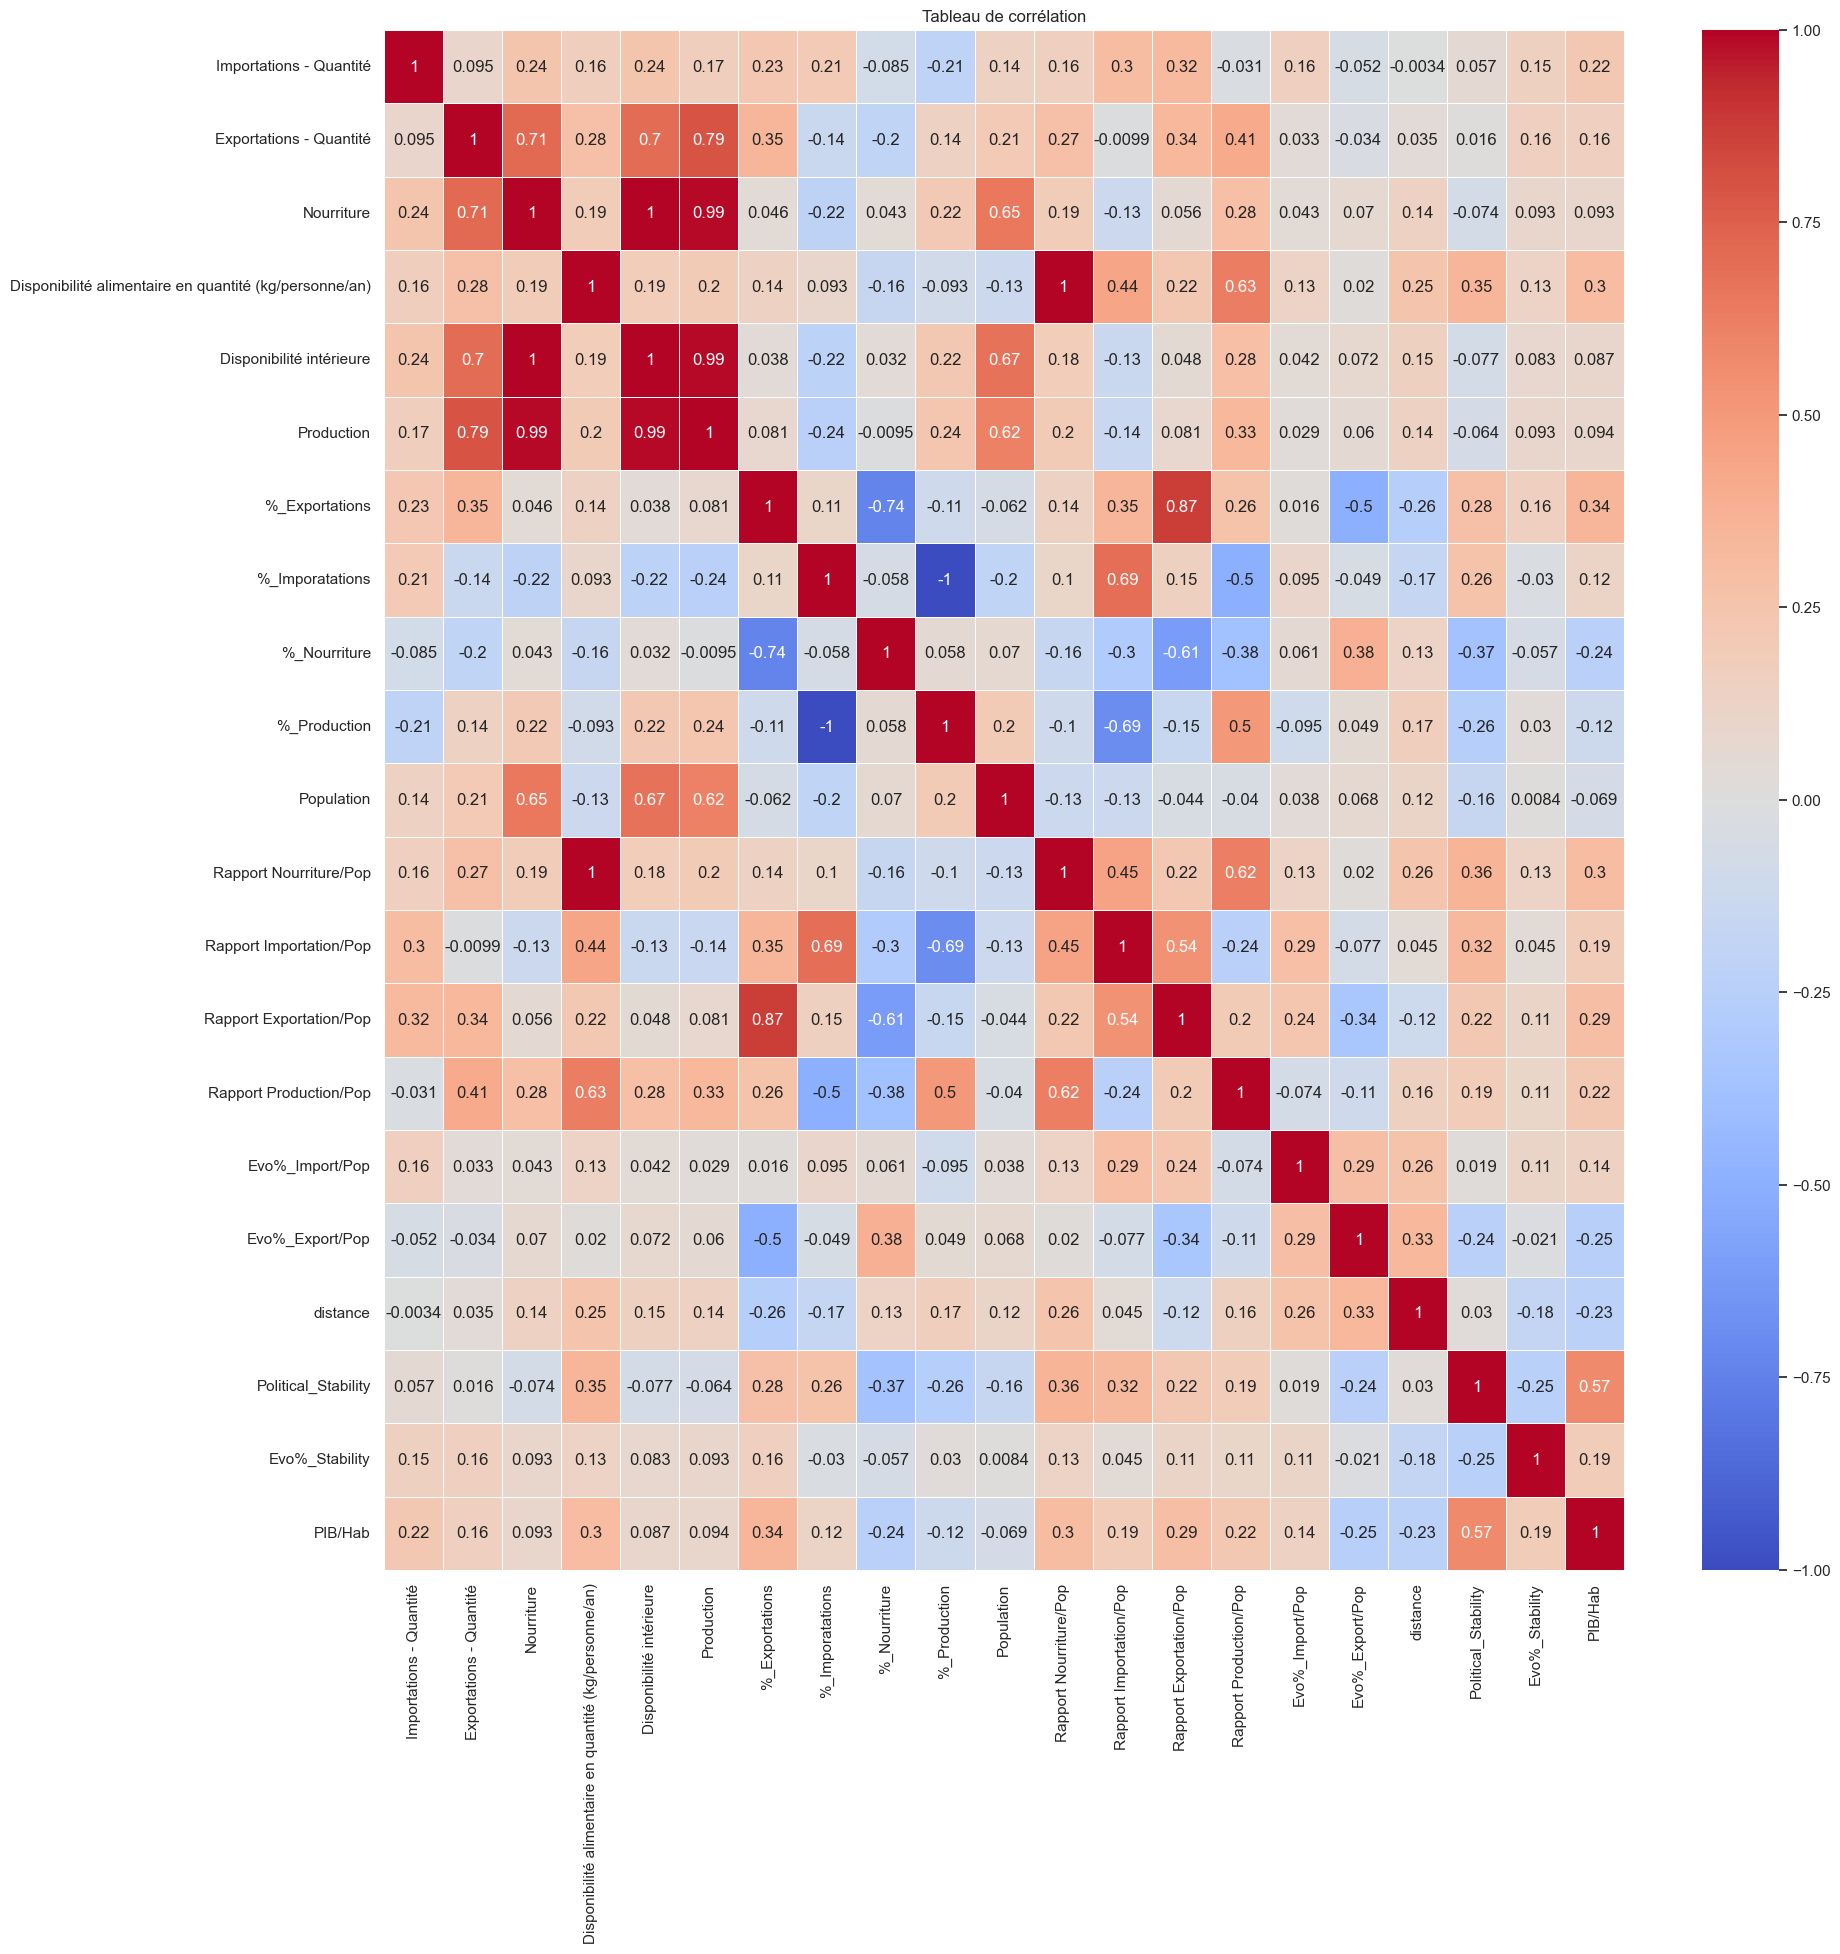

In [489]:
heatmap(df_final)

On supprime les variables qui ne sont pas utile pour la suite

In [490]:
df_final = df_final.drop(columns=['Disponibilité intérieure', 'Rapport Nourriture/Pop', 'Population', 'Nourriture', 'Production', 'Importations - Quantité', 'Exportations - Quantité', '%_Imporatations', 'Evo%_Stability'], axis=1)

In [491]:
df_final.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),%_Exportations,%_Nourriture,%_Production,Rapport Importation/Pop,Rapport Exportation/Pop,Rapport Production/Pop,Evo%_Import/Pop,Evo%_Export/Pop,distance,Political_Stability,PIB/Hab
1,Afrique du Sud,35.69,2.888583,93.305823,76.432829,9.016001,1.105074,29.240609,0.164938,-0.359247,8789.06,-0.28,6723.928582
2,Albanie,16.36,0.000000,92.156863,25.490196,13.175372,0.000000,4.507364,-5.830877,0.002521,1545.60,0.38,4521.752217
3,Algérie,6.38,0.000000,95.306859,99.277978,0.048322,0.000000,6.644247,1.041509,0.000000,2023.54,-0.92,4134.936055
4,Allemagne,19.47,27.419355,68.293718,64.261460,10.186501,7.815297,18.316346,-6.853765,-22.374989,815.79,0.59,44670.222282
5,Angola,10.56,0.000000,98.746082,13.166144,9.290075,0.000000,1.408603,-0.267012,0.000000,6574.32,-0.33,4042.681403


In [492]:
len(df_final.columns)

13

Visualisation des données avec des boxplot 

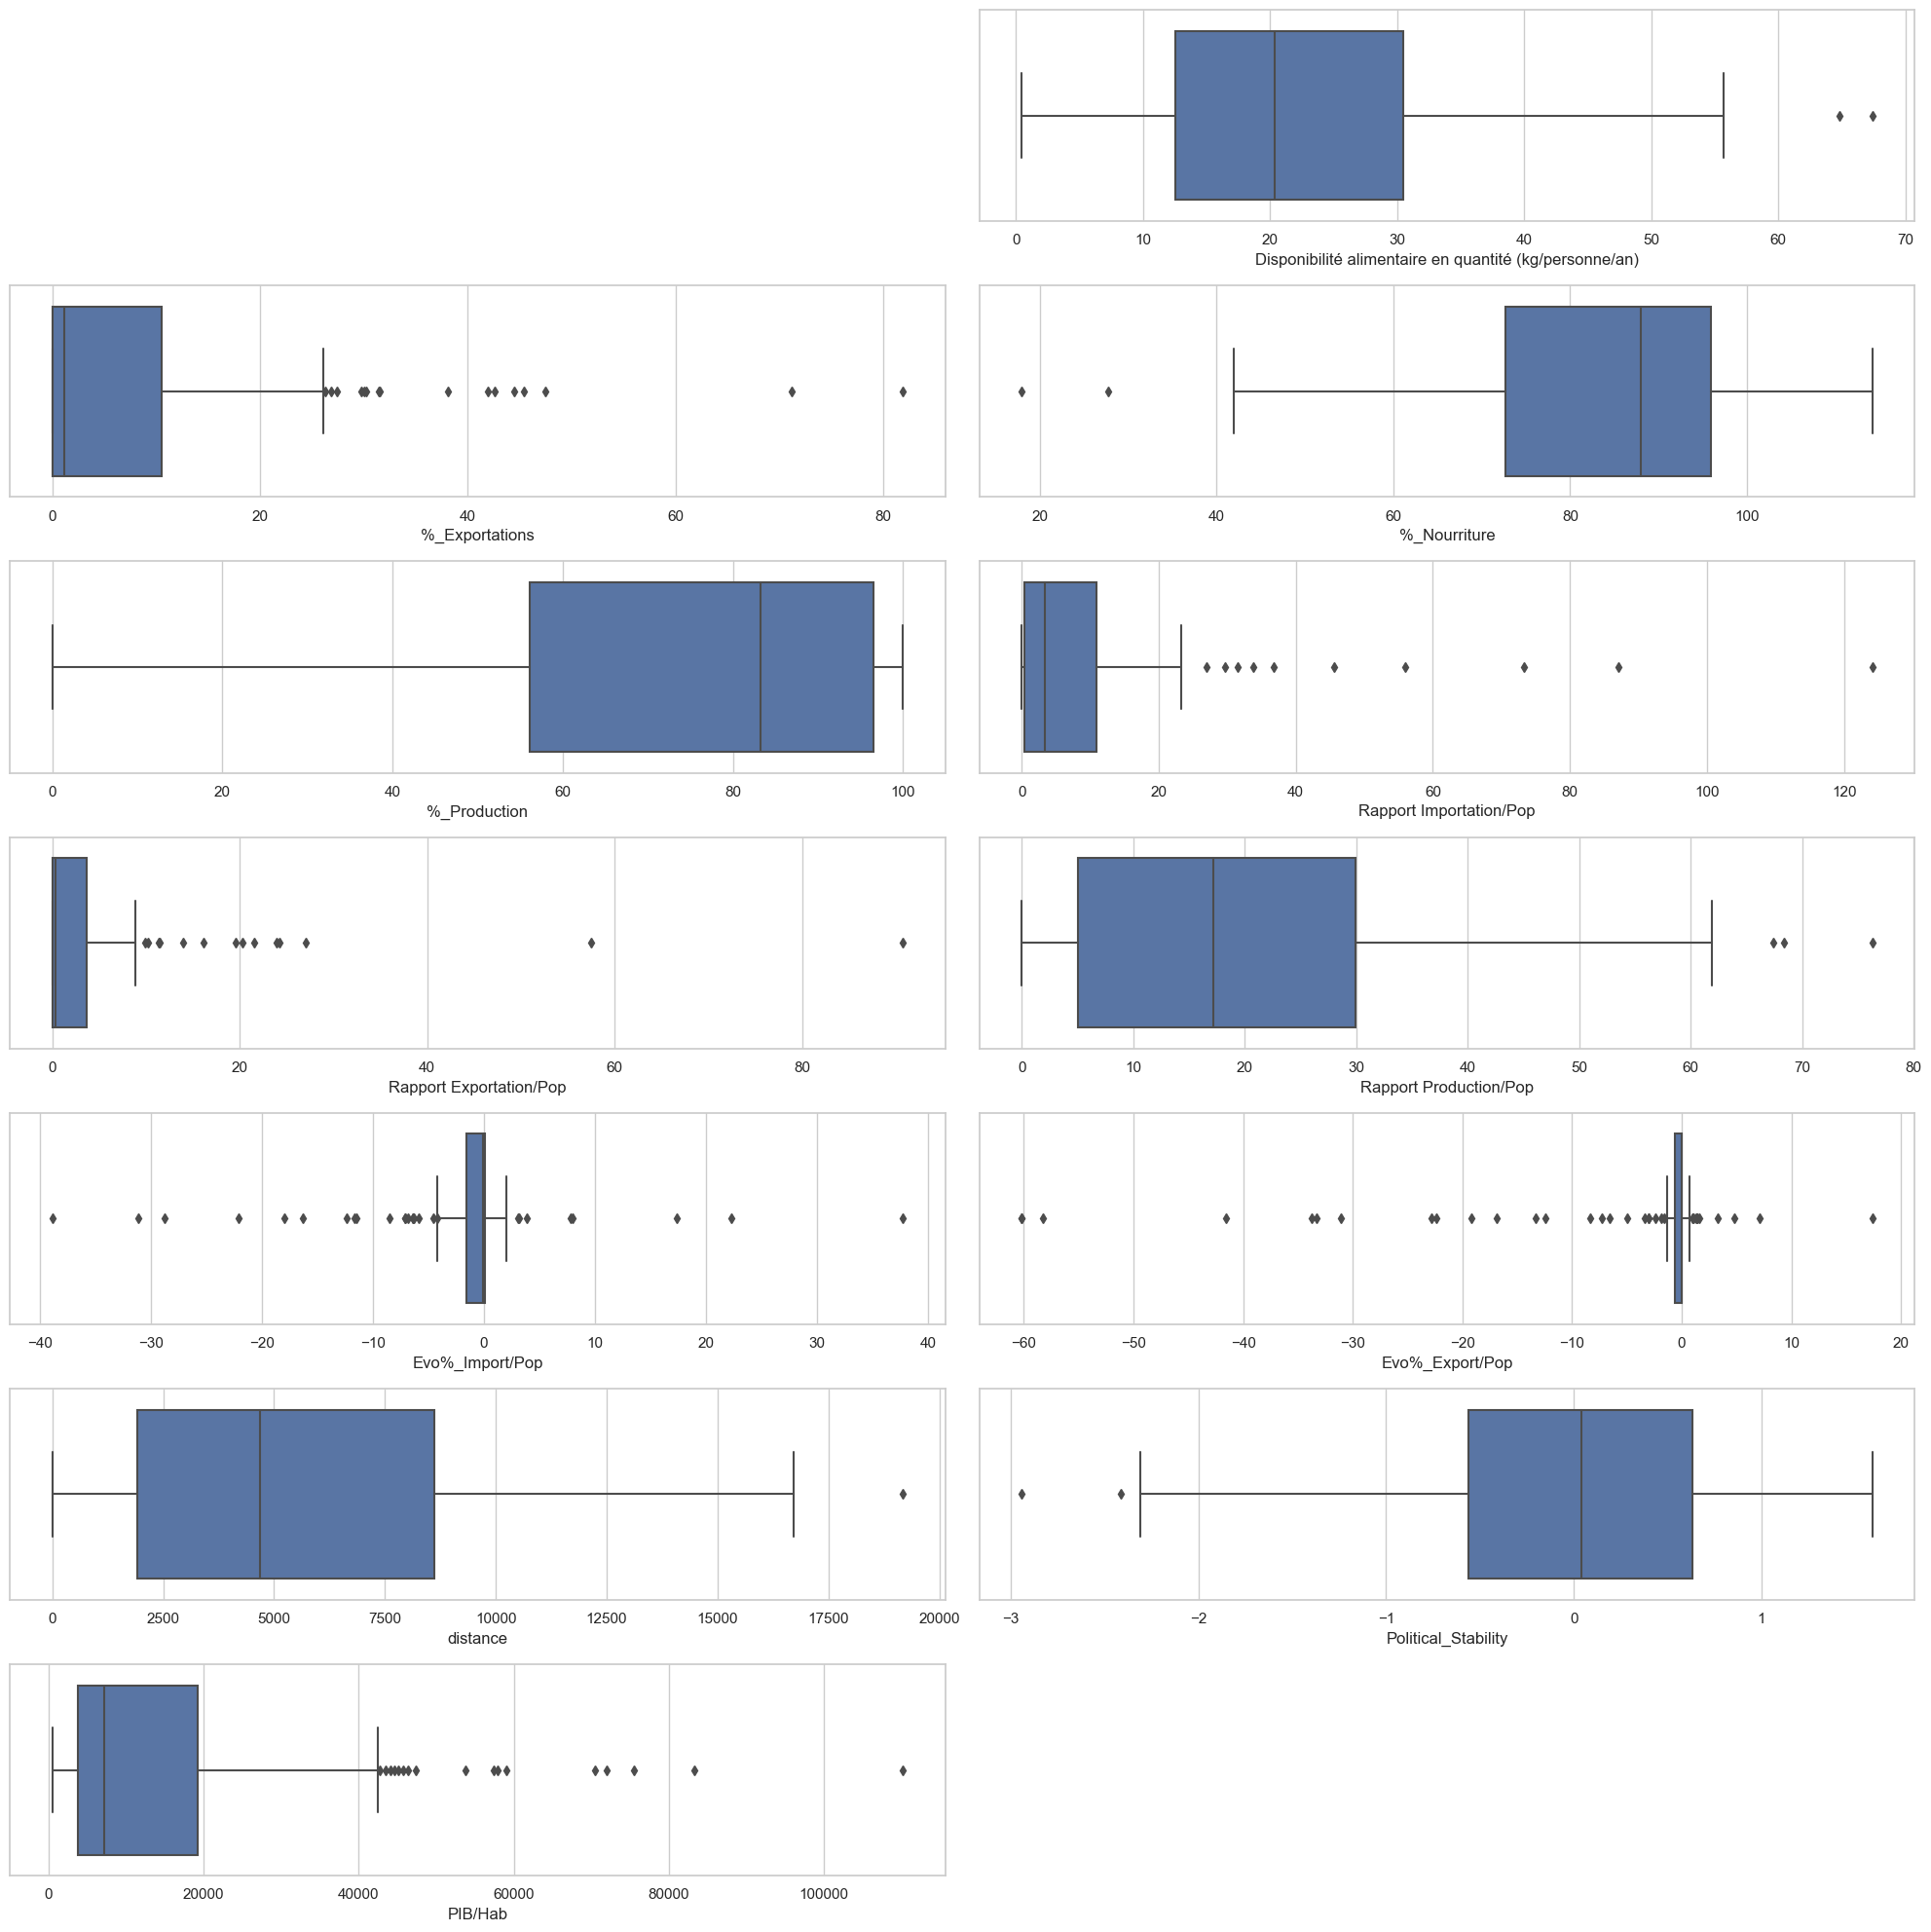

In [493]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(7, 2, figsize=(20, 20))

for index, column in enumerate(df_final.columns):
    i, j = divmod(index, 2)  # Calcul pour déterminer la position de l'axe (i, j)
    if i == 0 and j == 0:
        pass
    else:
        sns.boxplot(ax=ax[i, j], data=df_final, x=df_final[column])

ax[0, 0].set_visible(False)
ax[6, 1].set_visible(False)

plt.tight_layout()
plt.show()

In [494]:
#mean = np.mean(df_final['Population'])
#std = np.std(df_final['Population'])
#df_final['z_scores'] = (df_final['Population'] - mean) / std
#df_final_outlier_population= df_final.loc[(df_final['z_scores'] > 1) | (df_final['z_scores'] < -0.27)]
#df_final_outlier_population.head(20)

C:\Users\kilia\AppData\Local\Temp\ipykernel_4936\3338242466.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final.corr()


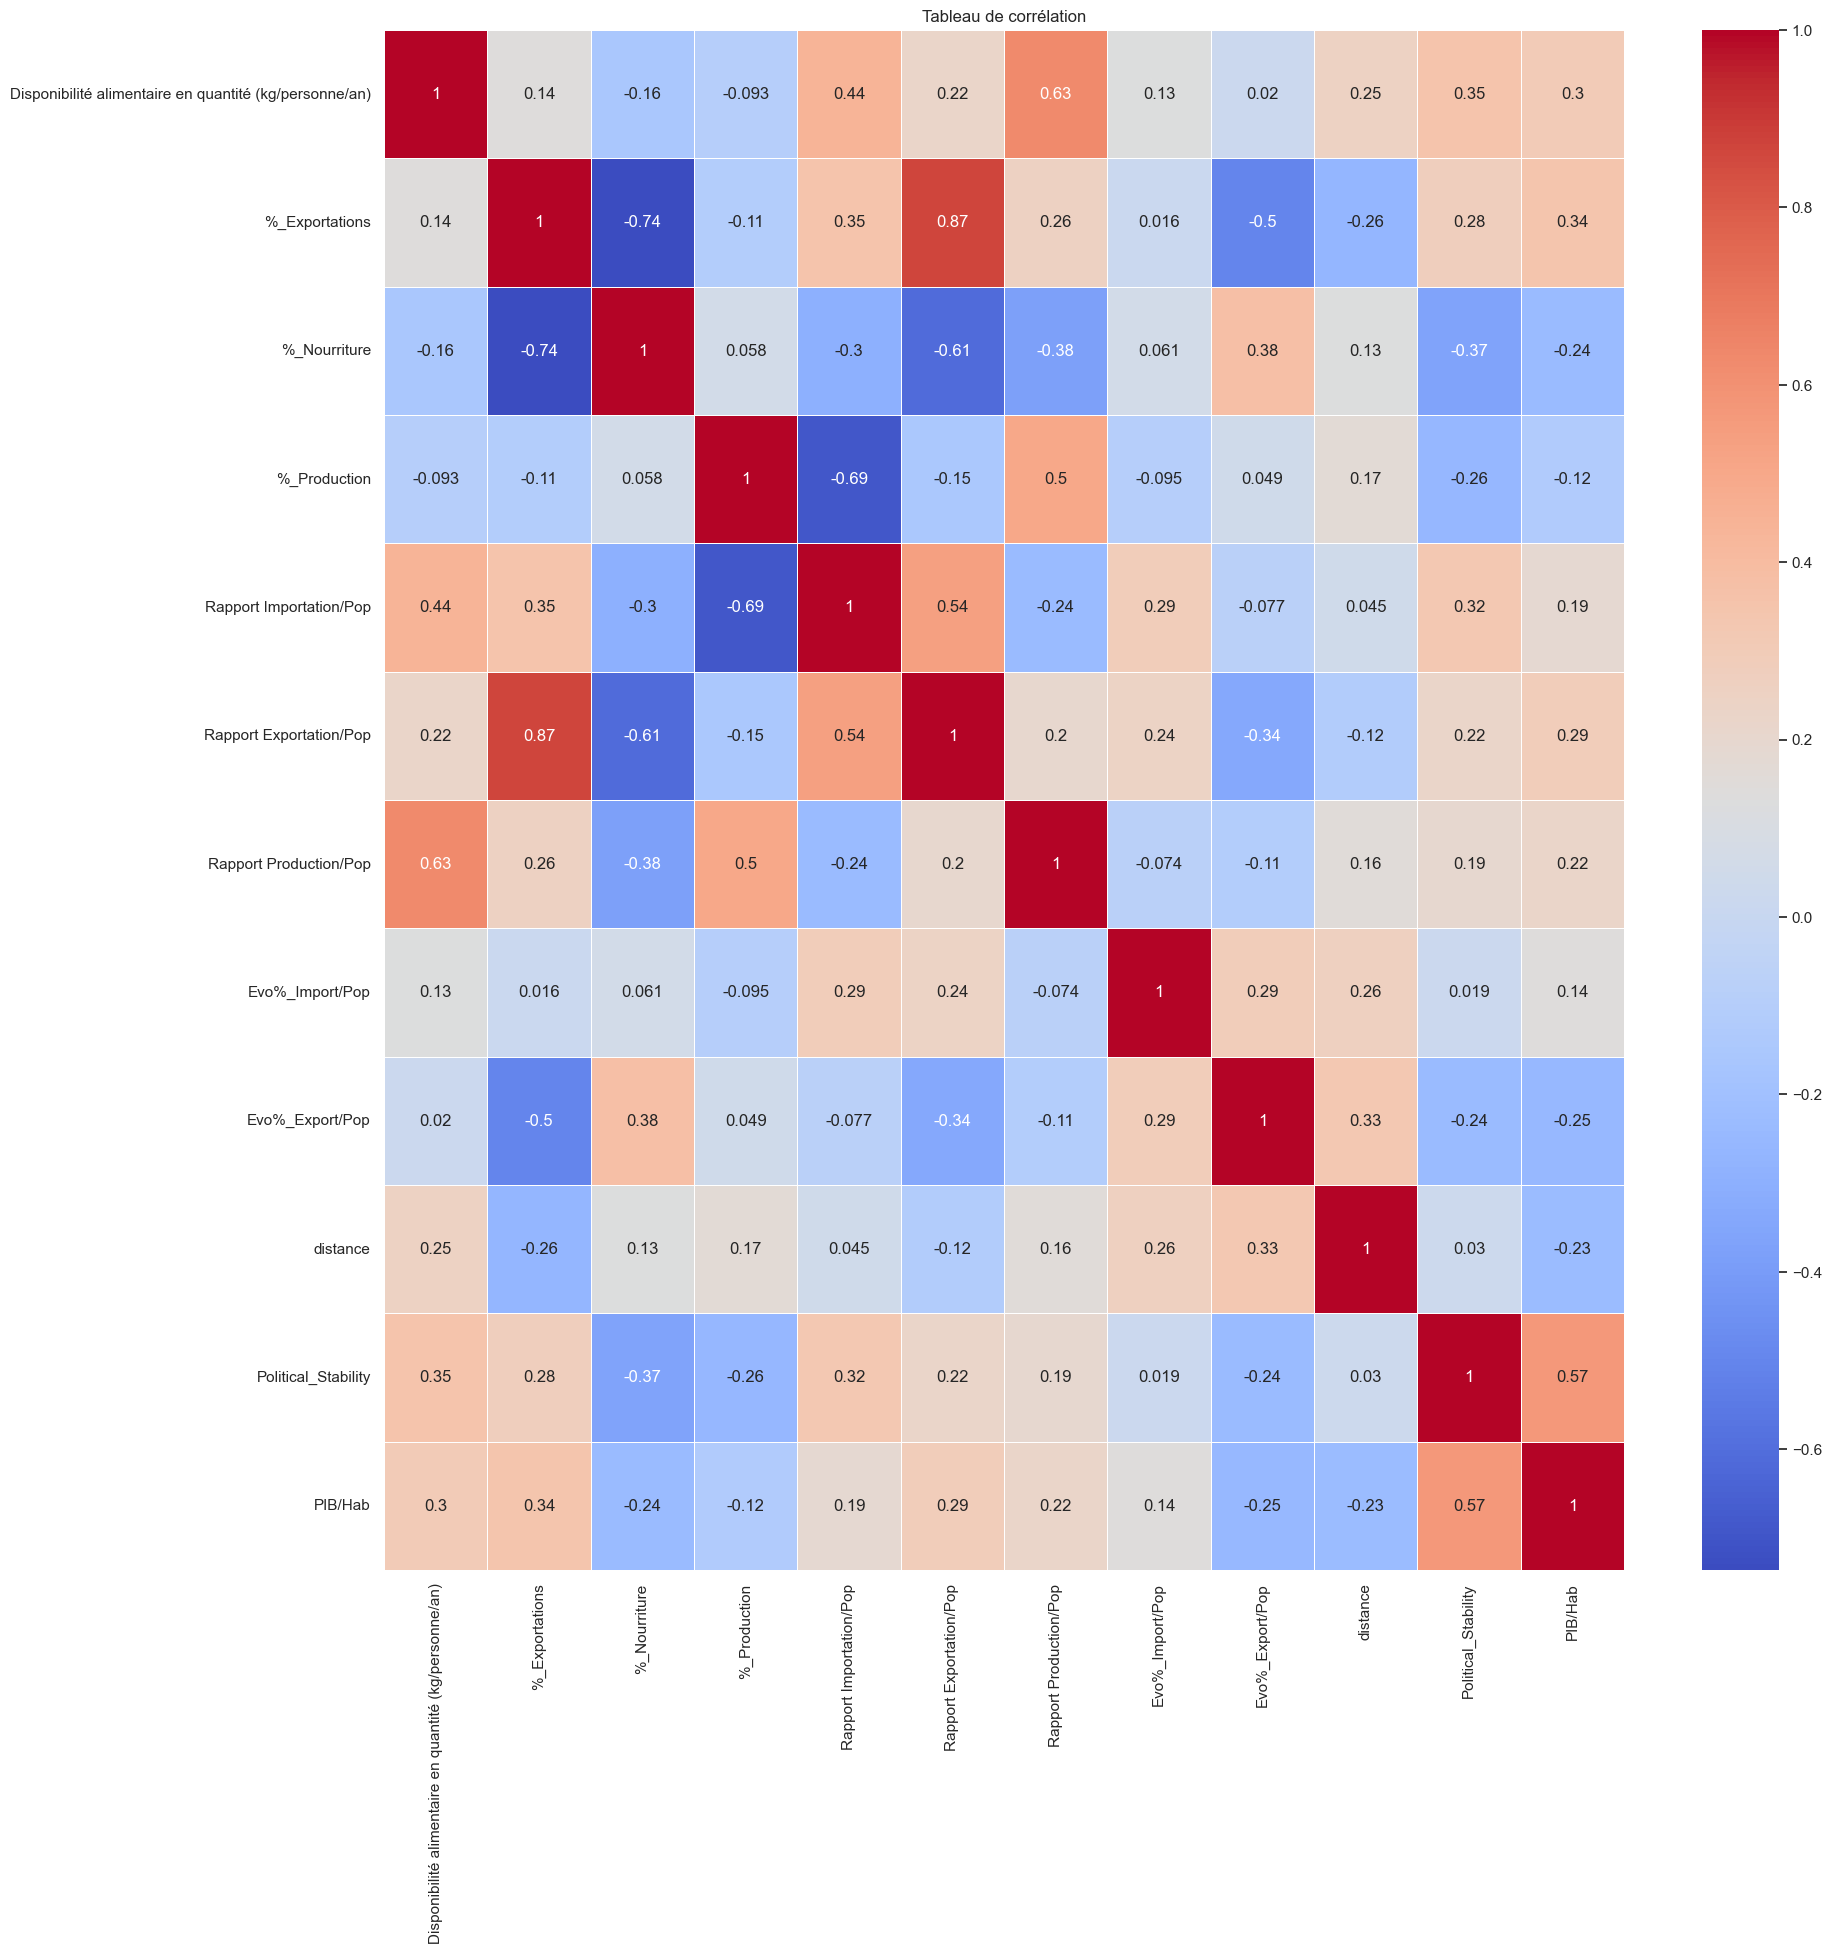

In [495]:
heatmap(df_final)

On exporte le csv final

In [496]:
df_final.to_csv('df_final.csv', index=False)

In [497]:
len(df_final)

124

In [499]:
df_final.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),%_Exportations,%_Nourriture,%_Production,Rapport Importation/Pop,Rapport Exportation/Pop,Rapport Production/Pop,Evo%_Import/Pop,Evo%_Export/Pop,distance,Political_Stability,PIB/Hab
1,Afrique du Sud,35.69,2.888583,93.305823,76.432829,9.016001,1.105074,29.240609,0.164938,-0.359247,8789.06,-0.28,6723.928582
2,Albanie,16.36,0.000000,92.156863,25.490196,13.175372,0.000000,4.507364,-5.830877,0.002521,1545.60,0.38,4521.752217
3,Algérie,6.38,0.000000,95.306859,99.277978,0.048322,0.000000,6.644247,1.041509,0.000000,2023.54,-0.92,4134.936055
4,Allemagne,19.47,27.419355,68.293718,64.261460,10.186501,7.815297,18.316346,-6.853765,-22.374989,815.79,0.59,44670.222282
5,Angola,10.56,0.000000,98.746082,13.166144,9.290075,0.000000,1.408603,-0.267012,0.000000,6574.32,-0.33,4042.681403
